## Task 2

## Performing Data Cleaning And Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile, os, io


In [3]:
# Unzip and load the train.csv file
with zipfile.ZipFile("titanic.zip", "r") as z:
    z.extractall("titanic_data")

df = pd.read_csv("titanic_data/train.csv")

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Dataset info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Data Cleaning
# --- 1. Remove Duplicates ---
df_clean = df.drop_duplicates()

# --- 2. Handle Missing 'Cabin' (too many nulls, so drop it) ---
df_clean = df_clean.drop(columns=["Cabin"])

# --- 3. Fill Missing 'Embarked' with Mode ---
df_clean["Embarked"] = df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0])

# --- 4. Fill Missing 'Fare' with Median Fare by Pclass ---
df_clean["Fare"] = df_clean.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))

# --- 5. Create Title Feature from Name ---
df_clean["Title"] = df_clean["Name"].str.extract(r"([A-Za-z]+)\.", expand=False)

# Simplify rare titles
df_clean["Title"] = df_clean["Title"].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_clean["Title"] = df_clean["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# --- 6. Fill Missing Age by Title Median ---
df_clean["Age"] = df_clean.groupby("Title")["Age"].transform(lambda x: x.fillna(x.median()))

# --- 7. Verify no missing values remain ---
print(df_clean.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


# Exploratory Data Analysis

## Survival Rate of Sex

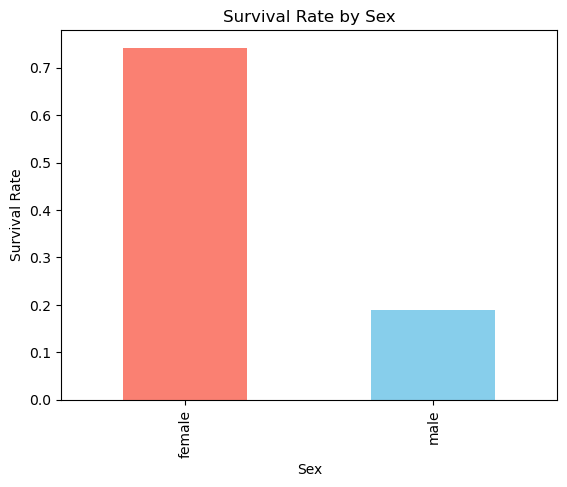

In [15]:
df_clean.groupby("Sex")["Survived"].mean().plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()


## Survival Rate by Passenger Class

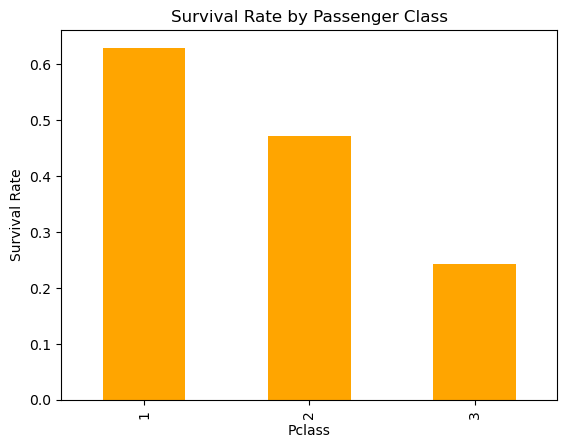

In [20]:
df_clean.groupby("Pclass")["Survived"].mean().plot(kind="bar", color="orange")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


## Age Distribution of Passengers

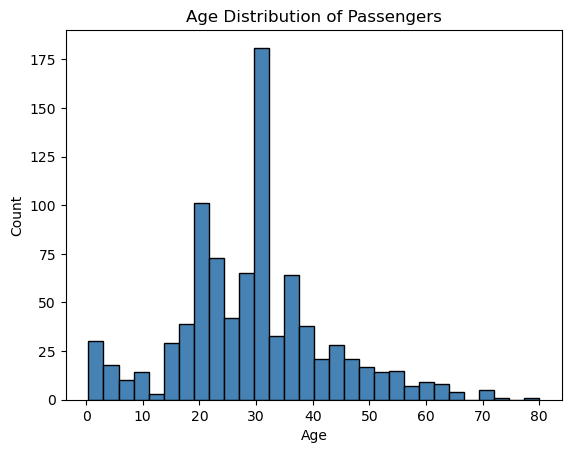

In [23]:
plt.hist(df_clean["Age"], bins=30, color="steelblue", edgecolor="black")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Survival Rate by Family Size

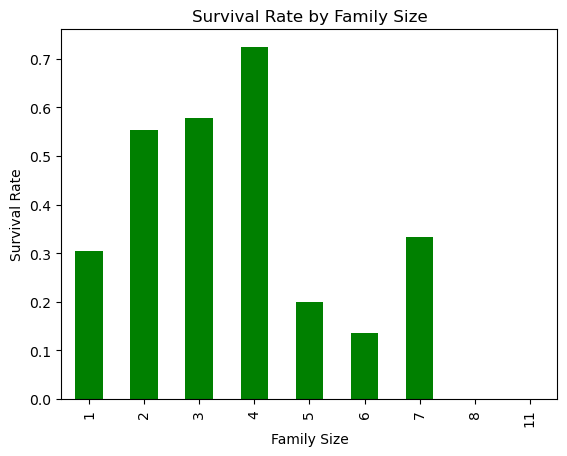

In [28]:
# Create FamilySize column
df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"] + 1  # +1 for the passenger themselves

# Now you can plot survival rate by FamilySize
import matplotlib.pyplot as plt

df_clean.groupby("FamilySize")["Survived"].mean().plot(kind="bar", color="green")
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()


## Survival Rate by Titlelt.show()


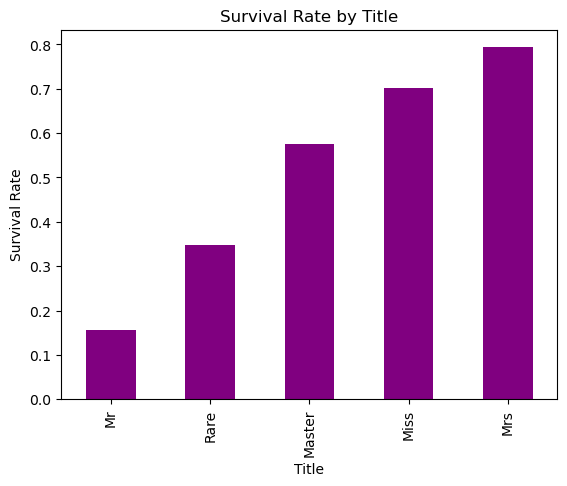

In [34]:
df_clean.groupby("Title")["Survived"].mean().sort_values().plot(kind="bar", color="purple")
plt.title("Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.show()


## Correlation Analysis

Missing values per column:
 PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Title           0
FamilySize      0
IsAlone         0
HasCabin        0
Sex_num         0
Embarked_num    0
dtype: int64


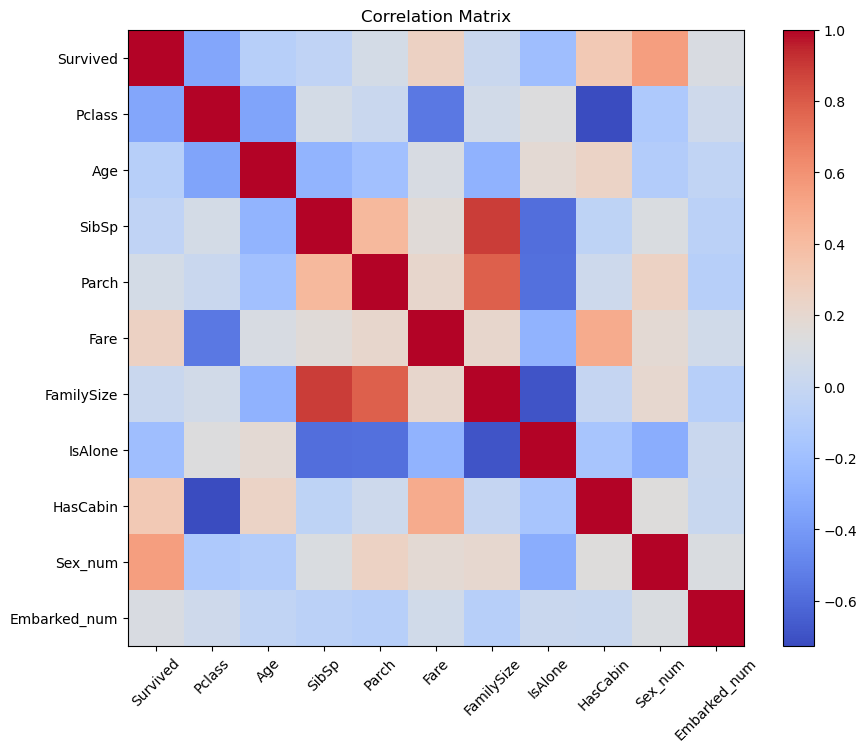

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Remove Duplicates ---
df_clean = df.drop_duplicates()

# --- 2. Handle Missing 'Cabin' (too many nulls, so drop it later for HasCabin feature) ---
# We'll keep Cabin temporarily for HasCabin
# df_clean = df_clean.drop(columns=["Cabin"])  # Don't drop yet

# --- 3. Fill Missing 'Embarked' with Mode ---
df_clean["Embarked"] = df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0])

# --- 4. Fill Missing 'Fare' with Median Fare by Pclass ---
df_clean["Fare"] = df_clean.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))

# --- 5. Create Title Feature from Name ---
df_clean["Title"] = df_clean["Name"].str.extract(r"([A-Za-z]+)\.", expand=False)

# Simplify rare titles
df_clean["Title"] = df_clean["Title"].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_clean["Title"] = df_clean["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# --- 6. Fill Missing Age by Title Median ---
df_clean["Age"] = df_clean.groupby("Title")["Age"].transform(lambda x: x.fillna(x.median()))

# --- 7. Create FamilySize and IsAlone ---
df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"] + 1
df_clean["IsAlone"] = (df_clean["FamilySize"] == 1).astype(int)

# --- 8. Create HasCabin feature ---
df_clean["HasCabin"] = df_clean["Cabin"].notnull().astype(int)

# --- 9. Encode categorical features for correlation ---
df_clean["Sex_num"] = df_clean["Sex"].map({"male":0,"female":1}).astype(int)
df_clean["Embarked_num"] = df_clean["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)

# --- 10. Drop Cabin if you want to remove original column ---
df_clean = df_clean.drop(columns=["Cabin"])

# --- 11. Verify no missing values remain ---
print("Missing values per column:\n", df_clean.isnull().sum())

# --- 12. Correlation matrix ---
numeric_cols = ["Survived","Pclass","Age","SibSp","Parch","Fare","FamilySize",
                "IsAlone","HasCabin","Sex_num","Embarked_num"]
corr = df_clean[numeric_cols].corr()

# --- 13. Plot correlation heatmap ---
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")
plt.show()
